# Mini Project 1

### Importing Necessary Dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3)

### Helper Functions

In [3]:
def izhikevich_neuron():
    """
            # The izhikevich Bursting Neuron Model
        a mathematical model to generate a bursting neuron behaviour
        dv/dt = 0.04v^2 + 5v + 140 - u + I_ext
        du/dt = a(bv-u)
        where
        v and u = dimensionless variables
        a, b, c, d = dimensionless variables
        ` = d/dt → Derivative with respect to time
        v = membrane potential
        u = membrane recovery variable
        I_ext = synpatic currents / injected dc-currents
    """
    a = 0.02
    b = 0.2
    c = -50.0     # slightly higher reset → more spikes in each burst
    d = 2.0       # larger recovery boost → stronger burst patterns

    v = -65.0
    u = b * v

    # Strong DC current → frequent bursting
    I_ext = 16.0

    dt = 0.1
    T = 1000.0                 # 1 second → many bursts
    time = np.arange(0, T, dt)
    n_steps = len(time)

    v_trace = np.zeros(n_steps)
    spikes = []

    for i in range(n_steps):

        if v >= 30:
            spikes.append(time[i])
            v = c
            u += d

        dv = (0.04*v*v + 5*v + 140 - u + I_ext) * dt
        du = a * (b*v - u) * dt

        v += dv
        u += du
        v_trace[i] = v
    
    return spikes

### Generating Data

In [142]:
neuron_a = np.arange(10,1000,10)

neuron_b = np.arange(10,1000,10)
regular_noise = np.random.normal(0,2,neuron_b.shape) # 0 mean and 2 standard deviation
neuron_b = neuron_b + regular_noise

neuron_c = izhikevich_neuron() # Mathematical model that generates a bursting neuron
neuron_c = np.array(neuron_c)

## Part A: Visualizing Spike Trains

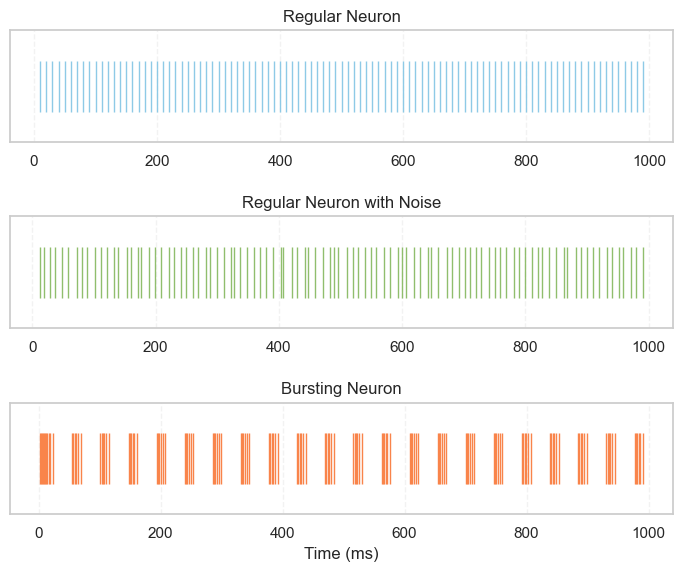

In [150]:
fig, axs = plt.subplots(3, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=2.5)

colors = {
    "regular": "#8ecae6",   
    "noisy":   "#90be6d",  
    "burst":   "#f9844a" 
}

# Regular neuron
axs[0].set_title("Regular Neuron")
axs[0].eventplot(
    neuron_a,
    orientation="horizontal",
    linelengths=0.6,
    linewidths=1.0,
    color=colors["regular"]
)

# Noisy neuron
axs[1].set_title("Regular Neuron with Noise")
axs[1].eventplot(
    neuron_b,
    orientation="horizontal",
    linelengths=0.6,
    linewidths=1.0,
    color=colors["noisy"]
)

# Bursting neuron
axs[2].set_title("Bursting Neuron")
axs[2].eventplot(
    neuron_c,
    orientation="horizontal",
    linelengths=0.6,
    linewidths=1.0,
    color=colors["burst"]
)

for ax in axs:
    ax.set_yticks([])
    ax.grid(axis="x", linestyle="--", alpha=0.25)

axs[-1].set_xlabel("Time (ms)")

plt.show()


### Question A answer
The results did match up to my expectations which I expected some irregularity in the regular neuron with a little bit of noise, that is proportional to the standard deviation value provided in the np.random.normal(mean,sd,size)

Similarly for the bursting neuron type, I expected the raster plot to be full of lines in certain regions and no firings/lines in others. And, that is exactly what is observed in the graphs.

# Part B: Analyze Inter-Spike Intervals(ISI)

In [ ]:
# For each neuron, calculate the ISI:
ISI_a = np.diff(neuron_a)
ISI_b = np.diff(neuron_b)
ISI_c = np.diff(neuron_c)

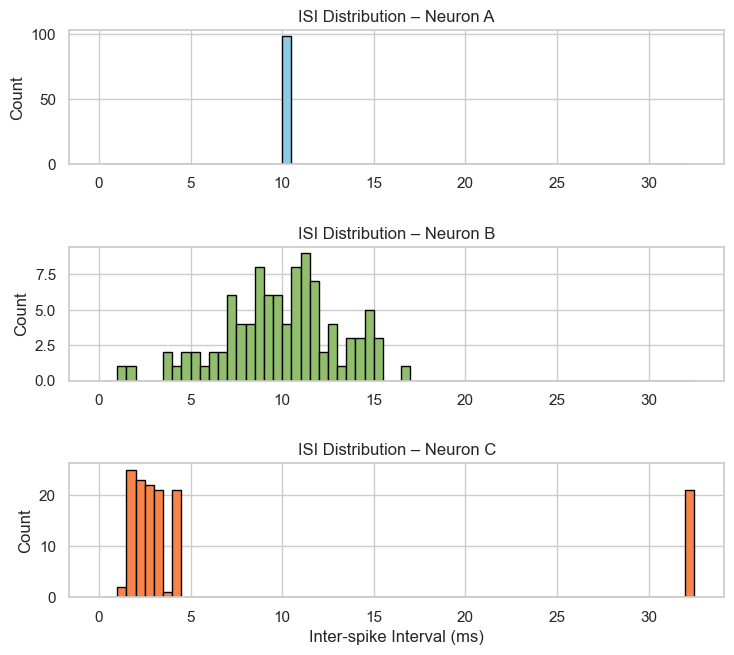

In [148]:
bin_size = 0.5 
max_isi = max(np.max(ISI_a), np.max(ISI_b), np.max(ISI_c))
bins = np.arange(0, max_isi + bin_size, bin_size)

fig, axs = plt.subplots(3, 1, figsize=(8, 7))
fig.tight_layout(pad=3.0)

# Neuron A
axs[0].hist(ISI_a, bins=bins,color="#8ecae6", edgecolor='black')
axs[0].set_title("ISI Distribution – Neuron A")
axs[0].set_ylabel("Count")

# Neuron B
axs[1].hist(ISI_b, bins=bins, color="#90be6d",edgecolor='black')
axs[1].set_title("ISI Distribution – Neuron B")
axs[1].set_ylabel("Count")

# Neuron C
axs[2].hist(ISI_c, bins=bins, color="#f9844a", edgecolor='black')
axs[2].set_title("ISI Distribution – Neuron C")
axs[2].set_ylabel("Count")
axs[2].set_xlabel("Inter-spike Interval (ms)")

plt.show()


### Questions B answers

1. The histogram for a perfectly regular neuron is just one long bin because there is only one uniform interval between the spikes and in our case it is 10.

2. By adding gaussian noise, the ISI plot became normalized around the a mean of 10(which is also similar to the regular neuron spike interval) and added noise with standard deviation of 2. so the plot ended up looking like bell shaped plot.

3. The ISI histogram of a bursting neuron is very irregular with most bars accumulating in the range of 0-5(close distance burst intervals) and one long bin as the maximum interval

# Part C: Generate and classify your own neuron

In [166]:
intervals = np.random.normal(10, 2, 100)  
# 10 and 2 are given but I chose 100 as the size because 
# I calculated there would be 100 intervals in a neuron that is almost like neuron_b i.e little noise
spike_times = np.cumsum(intervals)

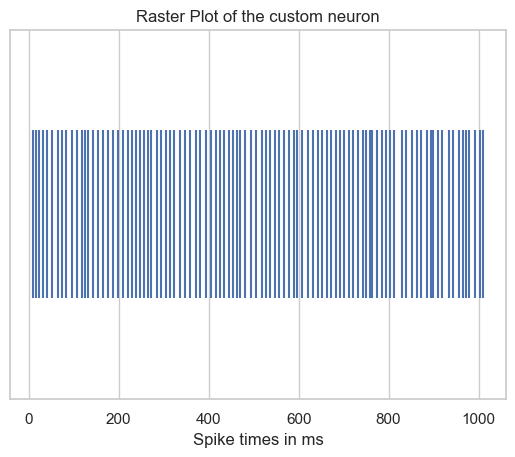

In [167]:
plt.eventplot(spike_times)
plt.title("Raster Plot of the custom neuron")
plt.xlabel("Spike times in ms")
plt.yticks([])
plt.show()

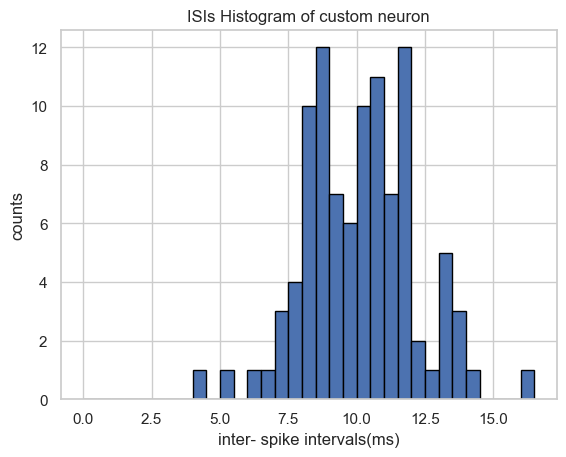

In [168]:
# Plot the ISI Histogram of your simulated neuron
ISI_custom = np.diff(spike_times) # Calculates the intervals
bin_size = 0.5
max_isi = np.max(ISI_custom)
bins = np.arange(0, max_isi + bin_size, bin_size)
plt.hist(ISI_custom, bins=bins, edgecolor='black')
plt.title('ISIs Histogram of custom neuron')
plt.xlabel('inter- spike intervals(ms)')
plt.ylabel('counts')
plt.show()

### Question C Answers

The custom neuron's histogram shows a bell shaped unimodal distribution centered around the mean ISI of 10ms, which is also the charactersitc of neuron_b. 

1. By observation, my custom neuron resembles neuron_b 
2. the features of the ISE hsitogram that led me to this decision is the center of the distribution(mean) and the width(standard deviation)
3. Upon increasing the standard deviation, the width of the distribution became more wider accounting to more noise within the spiking pattern.